# Name : Subhashree Dash

## Task 2 : Implement an image color detector which identifies all the colors in an image

## GRIP @ The Sparks Foundation
## #GRIP_March21


## Color detection in image

# STEP 1: import libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import imutils

# STEP 2:Reading the image with opencv

In [2]:
image="colorpic.jpg"
image=cv2.imread(image)
image=imutils.resize(image, width=530, height=350)

# STEP 3: show image

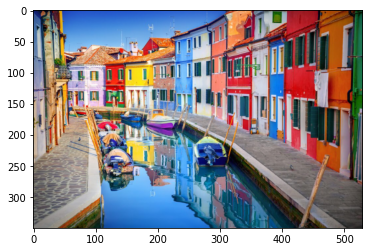

In [3]:
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# A csv file containing the RGB values along with its name has been created and is available online including their hex values.

# STEP 4: load colors csv dataset

In [4]:
colors="colors.csv"

index=["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv(colors, names=index, header=None)

# STEP 5: show dataset

In [5]:

csv.head()

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


# STEP 6: Variable declaration for RGB value & (X,Y) index

In [6]:
clicked = False
r = g = b = xpos = ypos = 0

# STEP 7:function to calculate minimum distance from all colors and get the most matching color

In [7]:
def recognize_color(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

# STEP 8:function to get x,y coordinates of mouse double click


In [8]:

def mouse_click(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = image[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

# STEP 9: A window named image pops up displaying the given image

# FINALLY DISPLAYS THE COLOR NAME FETCHED FROM CSV FILE AFTER CALCULATING THE LOCATION MOUSE WAS CLICKED IT IS DISPLAYED via A RECTANGLE AT THE TOP LEFT CORNER

In [9]:
cv2.namedWindow('Color Recognition App')
cv2.setMouseCallback('Color Recognition App', mouse_click)
while(1):
    cv2.imshow("Color Recognition App",image)
    if (clicked):
        #cv2.rectangle(image, startpoint, endpoint, color, thickness) -1 thickness fills rectangle entirely
        cv2.rectangle(image,(20,20), (750,60), (b,g,r), -1)

        #Creating text string to display ( Color name and RGB values )
        text = recognize_color(r,g,b) + ' R='+ str(r) + ' G='+ str(g) + ' B='+ str(b)

        #cv2.putText(img,text,start,font(0-7), fontScale, color, thickness, lineType, (optional bottomLeft bool) )
        cv2.putText(image, text,(50,50),2,0.8,(0,0,255),2,cv2.LINE_AA)
  #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(image, text,(50,50),2,0.8,(255,0,0),2,cv2.LINE_AA)

        clicked=False

    #Break the loop when user hits 'enter' key 
    if cv2.waitKey(20) & 0xFF ==13:
        break

cv2.destroyAllWindows()

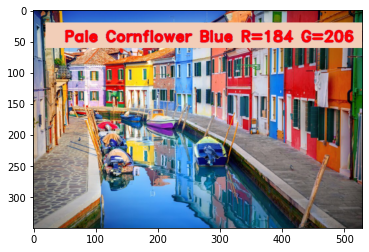

In [10]:
plt.imshow(image)

## Detect color in images and classified based on similar color

In [11]:
#Import libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter

import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (662, 1000, 3)


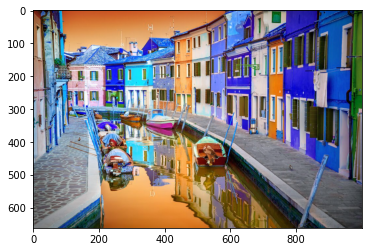

In [12]:
#read a sample image
image = cv2.imread('colorpic.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

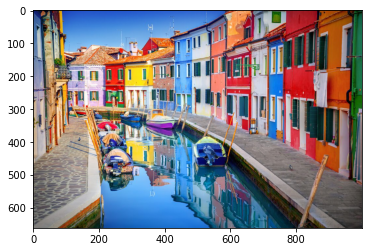

In [13]:
#image convert into BGR to RGB 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

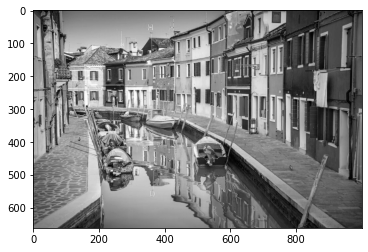

In [14]:
# image convert into BGR to Gray
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

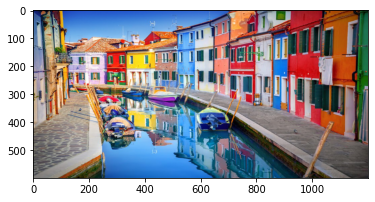

In [15]:
# Resize image
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [16]:
# define a function that can give us the Hex values of our the colors that we will identify
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [17]:
# define function for read images and convert into BGR to RGB 
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [18]:
# Color Identification
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([101.74547003, 167.6798505 , 230.49761082]),
 array([31.82248388, 55.2350628 , 57.68952655]),
 array([160.929082  , 149.23695497, 148.68137956]),
 array([178.96113401,  53.40780401,  30.19124841]),
 array([ 46.20372097, 115.19577642, 197.30943213]),
 array([226.42333373, 157.06456421,  84.45677835]),
 array([208.47616636, 204.04500855, 205.29271381]),
 array([108.37857853, 101.54147784, 102.81524262])]

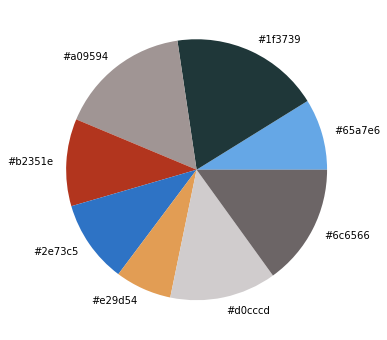

In [19]:
#Show All Colour Components of the image
get_colors(get_image('colorpic.jpg'), 8, True)

# Thank You